In [1]:
pip install  requests pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Fetch Data from API Endpoints
current_quiz_url = "https://www.jsonkeeper.com/b/LLQT"
quiz_submission_url = "https://api.jsonserve.com/rJvd7g"
historical_quiz_url = "https://api.jsonserve.com/XgAgFJ"

In [5]:
current_quiz_data = pd.DataFrame(requests.get(current_quiz_url).json())
quiz_submission_response = requests.get(quiz_submission_url).json()
historical_quiz_data = pd.DataFrame(requests.get(historical_quiz_url).json())

In [6]:
# Analyze Current Quiz Data
print("Current Quiz Data Schema:")
print(current_quiz_data.info())

Current Quiz Data Schema:
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, banner_id to updated_at
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quiz    26 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes
None


In [7]:
# Analyze Historical Quiz Data
print("Historical Quiz Data Schema:")
print(historical_quiz_data.info())

Historical Quiz Data Schema:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14 non-null     int64 
 1   quiz_id                14 non-null     int64 
 2   user_id                14 non-null     object
 3   submitted_at           14 non-null     object
 4   created_at             14 non-null     object
 5   updated_at             14 non-null     object
 6   score                  14 non-null     int64 
 7   trophy_level           14 non-null     int64 
 8   accuracy               14 non-null     object
 9   speed                  14 non-null     object
 10  final_score            14 non-null     object
 11  negative_score         14 non-null     object
 12  correct_answers        14 non-null     int64 
 13  incorrect_answers      14 non-null     int64 
 14  source                 14 non-null     object
 

In [8]:
# Insights: Weak Areas (Topics with Low Average Scores)
average_scores = historical_quiz_data.groupby('quiz_id')['score'].mean()
low_score_topics = average_scores[average_scores < 50]

In [9]:
print("\nWeak Areas (Topics with Average Score < 50):")
print(low_score_topics)



Weak Areas (Topics with Average Score < 50):
quiz_id
20    12.0
50    24.0
57    40.0
Name: score, dtype: float64


In [10]:
# Insights: Score Trends
historical_quiz_data['submitted_at'] = pd.to_datetime(historical_quiz_data['submitted_at'])
score_trends = historical_quiz_data[['submitted_at', 'score']].sort_values('submitted_at')


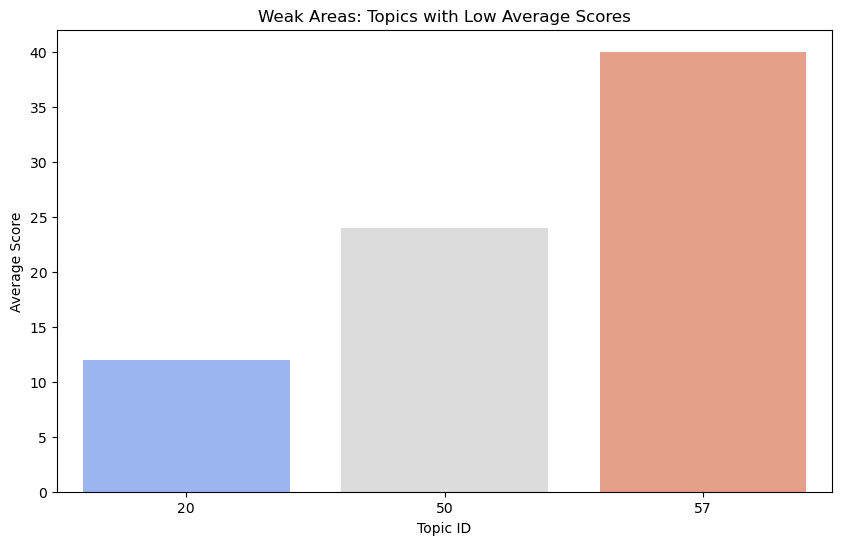

C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


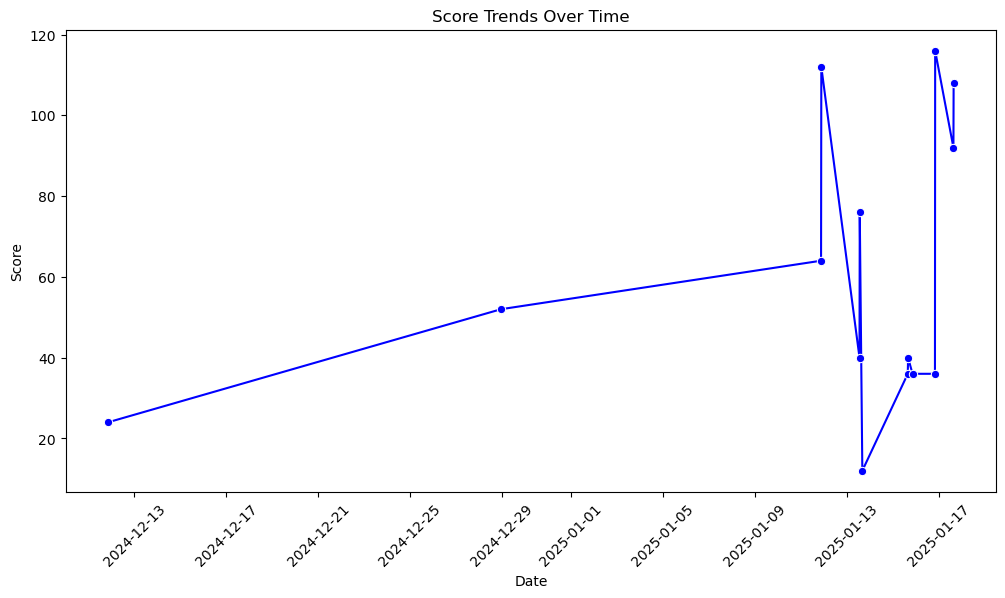

In [11]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=low_score_topics.index, y=low_score_topics.values, palette="coolwarm")
plt.title("Weak Areas: Topics with Low Average Scores")
plt.xlabel("Topic ID")
plt.ylabel("Average Score")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=score_trends['submitted_at'], y=score_trends['score'], marker="o", color="blue")
plt.title("Score Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Difficulty and Accuracy Analysis
historical_quiz_data['accuracy'] = historical_quiz_data['accuracy'].str.rstrip('%').astype(float)
difficulty_scores = historical_quiz_data.groupby('type')['score'].mean()
accuracy_by_topic = historical_quiz_data.groupby('quiz_id')['accuracy'].mean()

print("\nDifficulty vs. Scores:")
print(difficulty_scores)

print("\nAccuracy by Topic:")
print(accuracy_by_topic)


Difficulty vs. Scores:
type
topic    60.285714
Name: score, dtype: float64

Accuracy by Topic:
quiz_id
6      80.000000
18     92.000000
20     30.000000
24    100.000000
25     93.000000
50     66.000000
51     72.333333
57     38.000000
58     43.000000
Name: accuracy, dtype: float64


In [13]:
# Recommendations with Creative Labels
recommendations = {}
for topic in low_score_topics.index:
    recommendations[topic] = {
        'label': f"Struggler in Topic {topic}",
        'action': 'Focus on foundational concepts and practice targeted questions.',
        'suggested_resources': 'Videos, detailed notes, and mock tests.'
    }

print("\nRecommendations for Improvement:")
for topic, rec in recommendations.items():
    print(f"{rec['label']} - Action: {rec['action']} - Resources: {rec['suggested_resources']}")



Recommendations for Improvement:
Struggler in Topic 20 - Action: Focus on foundational concepts and practice targeted questions. - Resources: Videos, detailed notes, and mock tests.
Struggler in Topic 50 - Action: Focus on foundational concepts and practice targeted questions. - Resources: Videos, detailed notes, and mock tests.
Struggler in Topic 57 - Action: Focus on foundational concepts and practice targeted questions. - Resources: Videos, detailed notes, and mock tests.


In [14]:
# Student Persona Clustering
features = historical_quiz_data[['score', 'accuracy', 'correct_answers', 'incorrect_answers']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
historical_quiz_data['persona'] = kmeans.labels_

print("\nStudent Personas:")
print(historical_quiz_data[['user_id', 'persona']].drop_duplicates())

C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Student Personas:
                        user_id  persona
0  YcDFSO4ZukTJnnFMgRNVwZTE4j42        1
3  YcDFSO4ZukTJnnFMgRNVwZTE4j42        2
4  YcDFSO4ZukTJnnFMgRNVwZTE4j42        0


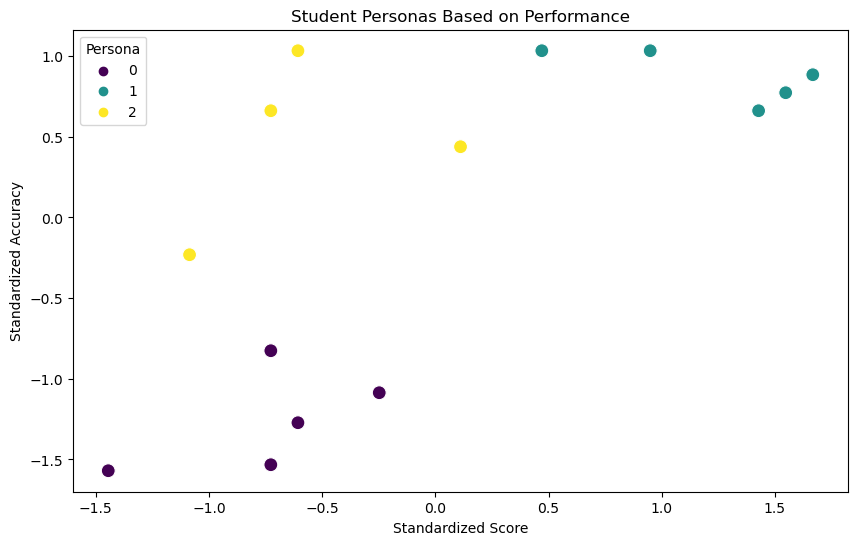

In [15]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans.labels_, palette="viridis", s=100
)
plt.title("Student Personas Based on Performance")
plt.xlabel("Standardized Score")
plt.ylabel("Standardized Accuracy")
plt.legend(title="Persona", loc='best')
plt.show()
